# FAIRe Qualitäts-KPIs
Autor:  Nilay Kuslugil
Datum:  30.10.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Sind die KPIs ein zuverlässiger Maßstab bezüglich der Qualität der Autos?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Ziel ist es ein Auto zu bauen, das die Funktion Bewegung erfüllt.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


[Auto 1](figures/AutoEinsBild.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Das Fahrzeug besitzt zwei Achsen für die 4 Räder, einen Motor, eine Batterie, eien Motorzahnrad, ein Zahnrad das am hinteren rechten Reifen platziert ist. Die Basis des Autos ist eine orangene Frame.

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [1]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *

In [2]:
# Achse erstellen
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

front_axle = LegoComponent("front axle", axles["60485"])

#Zweite Achse erstellen
back_axle = LegoComponent("back axle", axles["60485"])


#Räder erstellen
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
    
front_left_wheel = LegoComponent("front left wheel", wheels["3482c01"])


#Die anderen Räder erstellen durch Klon-Funktion
front_right_wheel = front_left_wheel.clone("front right wheel")
back_right_wheel = front_left_wheel.clone("back right wheel")
back_left_wheel = front_left_wheel.clone("back left wheel")


#Frame erstellen
with open("datasheets/frame.json") as json_file:
    frames = json.load(json_file)
    
frame = LegoComponent("frame", frames["32532"])


#Motor erstellen
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)

#Motor als Komponente
motor = LegoComponent("motor", motors["8883-1"])


#Motorachse erstellen
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)


#Motorachse als Komponente
motor_axle = LegoComponent("motor axle", axles["32073"])

 
#Reifenzahnrad erstellen
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)

reifenzahnrad_hinten_rechts= LegoComponent("reifenzahnrad hinten rechts", gears["3647"])


#Motorzahnrad erstellen  
motorzahnrad = LegoComponent("motorzahnrad", gears["3648"])

 
#Batterie erstellen
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
    
batterie = LegoComponent("batterie", batteries["88000-1"])



In [3]:
#Bauteile eine Farbe zuweisen
frame.properties["color"] = "orange"
motorzahnrad.properties["color"] = "pink"

In [4]:
#Baugruppe Fahrwerk erstellen
fahrwerk_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "fahrwerk assembly")

#Der Baugruppe Fahrwerk Bauteile hinzufügen
fahrwerk_assembly.add([front_axle, back_axle, front_left_wheel, front_right_wheel, back_right_wheel, back_left_wheel, reifenzahnrad_hinten_rechts])


#Baugruppe Antrieb erstellen
antrieb_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "antrieb assembly")

#Der Baugruppe Antrieb Bauteile hinzufügen
antrieb_assembly.add([motor, motor_axle, motorzahnrad, batterie])


#Baugruppe Fahrgestell erstellen
fahrgestell_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "fahrgestell assembly")

#Der Baugruppe Fahrgestell Bauteile hinzufügen
fahrgestell_assembly.add([frame])


#Fahrzeug erstellen
AutoEins = LegoAssembly(AggregationLayer.SYSTEM, "AutoEins")

#Dem Fahrzeug die Baugruppen zuordnen
AutoEins.add([fahrwerk_assembly, antrieb_assembly, fahrgestell_assembly])

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

kpi_price = sum(AutoEins.properties["price [Euro]"])

kpi_delivery_time = max(AutoEins.properties("delivery time[days]")

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [5]:
#Gesamtpreis KPI berechnen
total_price1 = calculation_rules.kpi_total_price(AutoEins)
print("Gesamtpreis 1: ", total_price1, "Euro")
AutoEins.properties["price [Euro]"] = total_price1

#Gesamtmasse KPI berechnen
total_mass1 = calculation_rules.kpi_mass(AutoEins)
print("Gesamtmasse 1: ", total_mass1, "g")
AutoEins.properties["mass [g]"] = total_mass1

#Lieferungszeit KPI berechnen
delivery_time1 = calculation_rules.kpi_delivery_time(AutoEins)
print("Lieferzeit 1: ", delivery_time1, "Tage")
AutoEins.properties["delivery time [days]"] = delivery_time1


Gesamtpreis 1:  50.701 Euro
Gesamtmasse 1:  156.82999999999998 g
Lieferzeit 1:  11 Tage


In [6]:
print ("Gesamtpreis: ", total_price1, "Euro")
AutoEins.properties["price[Euro]"] = total_price1

print("Gesamtmasse: ", total_mass1, "g")
AutoEins.properties["mass[g]"] = total_mass1

print("Gesamtlieferzeit: ", delivery_time1, "Tage")
AutoEins.properties["delivery time[days]"] = delivery_time1

Gesamtpreis:  50.701 Euro
Gesamtmasse:  156.82999999999998 g
Gesamtlieferzeit:  11 Tage


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [7]:
AutoEins.properties["Gesamtpreis"] = total_price1
AutoEins.properties["Gesamtmasse"] = total_mass1
AutoEins.properties["Lieferzeit"] = delivery_time1

with open ("AutoEins.json", "w") as fp:
    json.dump(AutoEins.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Ziel ist es ein Auto zu bauen,dass die Funktion Bewegung erfüllt und eine höhere KPI Qualität aufweist als das erste Fahrzeug.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

[Auto 2](figures/AutoZweiBild.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Das zweite Auto besitz ein größeres rotes Fahrgestell, wieder mit zwei Achsen, wo jeweils die blauen Vorder- und Hinterräder befestigt sind. Es besitzt eine Batterie, einen Motor,der durch eine Achse mit dem korallfarbenden Motorzahnrad verbunden ist. Dieses ist widerum mit einem weiteren Zahnrad gekoppelt, das hinten rechts neben dem Reifen befestigt ist. An den anderen Reifen sind Distanzhalter um Fahrgestell und Reifen zu trennen. Motor und Batterie befinden sich auf zwei längliche Lego Blöcken die in der Mitte des Fahrgestells sind, diese Blöcke sind durch drei weitere Achsen am Gestell sicher.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [8]:
# Achse erstellen
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

front_axle = LegoComponent("front axle", axles["50451"])

#Zweite Achse erstellen
back_axle = LegoComponent("back axle", axles["50451"])


#Räder erstellen
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
    
front_left_wheel = LegoComponent("front left wheel", wheels["56904c02"])

#Die anderen Räder erstellen durch Klon-Funktion
front_right_wheel = front_left_wheel.clone("front right wheel")
back_right_wheel = front_left_wheel.clone("back right wheel")
back_left_wheel = front_left_wheel.clone("back left wheel")


#Frame erstellen
with open("datasheets/frame.json") as json_file:
    frames = json.load(json_file)
    
frame = LegoComponent("frame", frames["39790"])


#Distanzhalter erstellen
distanzhalter_front_right = LegoComponent("distanzhalter front right", frames["32123"])

#Die anderen Distanzhälter erstellen durch Klon-Funktion
distanzhalter_front_left = distanzhalter_front_right.clone("distanzhalter front right")
distanzhalter_back_left = distanzhalter_front_right.clone("distanzhalter back left")

                                                          
#Fahrgestell Achsen erstellen
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
                                                       
front_axle_gestell = LegoComponent("front axle gestell", axles["23948"])
                                                          
#Die anderen Achsen erstellen durch Klon-Funktion
center_axle_gestell = front_axle_gestell.clone("center axle gestell")
back_axle_gestell = front_axle_gestell.clone("back axle gestell")

                                                          
#Fahrstell Blöcke erstellen                                                          
with open("datasheets/frame.json") as json_file:
    frames = json.load(json_file)
                                                          
block1_gestell = LegoComponent("block1 gestell", frames["2730"])
                                                          
#Den anderen Gestell Block erstellen durch Klon-Funktion                                                          
block2_gestell = block1_gestell.clone("block2 gestell")

                                                          
#Motor erstellen
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)

#Motor als Komponente
motor = LegoComponent("motor", motors["88003-1"])


#Motorachse erstellen
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)


#Motorachse als Komponente
motor_axle = LegoComponent("motor axle", axles["32073"])

 
#Reifenzahnrad erstellen
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)

reifenzahnrad_back_right = LegoComponent("reifenzahnrad back right", gears["94925"])


#Motorzahnrad erstellen  
motorzahnrad = LegoComponent("motorzahnrad", gears["32498"])

 
#Batterie erstellen
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
    
batterie = LegoComponent("batterie", batteries["88000-1"])



In [9]:
#Bauteile eine Farbe zuweisen
frame.properties["color"] = "red"
motorzahnrad.properties["color"] = "salmon"
front_left_wheel.properties["color"] = "blue"
front_right_wheel.properties["color"] = "blue"
back_right_wheel.properties["color"] = "blue"
back_left_wheel.properties["color"] = "blue"

In [10]:
#Baugruppe Fahrwerk erstellen
fahrwerk_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "fahrwerk assembly")

#Der Baugruppe Fahrwerk Bauteile hinzufügen
fahrwerk_assembly.add([front_axle, back_axle, front_left_wheel, front_right_wheel, back_right_wheel, back_left_wheel, reifenzahnrad_back_right, distanzhalter_front_right, distanzhalter_front_left, distanzhalter_back_left])


#Baugruppe Antrieb erstellen
antrieb_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "antrieb assembly")

#Der Baugruppe Antrieb Bauteile hinzufügen
antrieb_assembly.add([motor, motor_axle, motorzahnrad, batterie])


#Baugruppe Fahrgestell erstellen
fahrgestell_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "fahrgestell assembly")

#Der Baugruppe Fahrgestell Bauteile hinzufügen
fahrgestell_assembly.add([frame, front_axle_gestell, center_axle_gestell, back_axle_gestell, block1_gestell, block2_gestell])


#Fahrzeug erstellen
AutoZwei = LegoAssembly(AggregationLayer.SYSTEM, "AutoZwei")

#Dem Fahrzeug die Baugruppen zuordnen
AutoZwei.add([fahrwerk_assembly, antrieb_assembly, fahrgestell_assembly])

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [11]:
#Gesamtpreis KPI berechnen
total_price2 = calculation_rules.kpi_total_price(AutoZwei)
print("Gesamtpreis 2: ", total_price2, "Euro")
AutoZwei.properties["price [Euro]"] = total_price2

#Gesamtmasse KPI berechnen
total_mass2 = calculation_rules.kpi_mass(AutoZwei)
print("Gesamtmasse 2: ", total_mass2, "g")
AutoZwei.properties["mass [g]"] = total_mass2

#Lieferungszeit KPI berechnen
delivery_time2 = calculation_rules.kpi_delivery_time(AutoZwei)
print("Lieferzeit 2: ", delivery_time2, "Tage")
AutoZwei.properties["delivery time [days]"] = delivery_time2


Gesamtpreis 2:  50.71099999999999 Euro
Gesamtmasse 2:  232.12 g
Lieferzeit 2:  12 Tage


In [12]:
print ("Gesamtpreis: ", total_price2, "Euro")
AutoZwei.properties["price[Euro]"] = total_price2

print("Gesamtmasse: ", total_mass2, "g")
AutoZwei.properties["mass[g]"] = total_mass2

print("Gesamtlieferzeit: ", delivery_time2, "Tage")
AutoZwei.properties["delivery time[days]"] = delivery_time2

Gesamtpreis:  50.71099999999999 Euro
Gesamtmasse:  232.12 g
Gesamtlieferzeit:  12 Tage


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [13]:
AutoZwei.properties["Gesamtpreis"] = total_price2
AutoZwei.properties["Gesamtmasse"] = total_mass2
AutoZwei.properties["Lieferzeit"] = delivery_time2

with open ("AutoZwei.json", "w") as fp:
    json.dump(AutoZwei.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

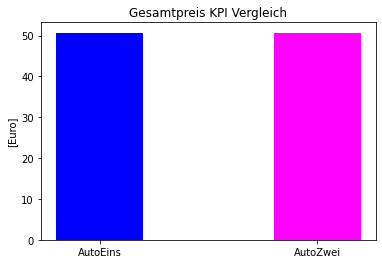

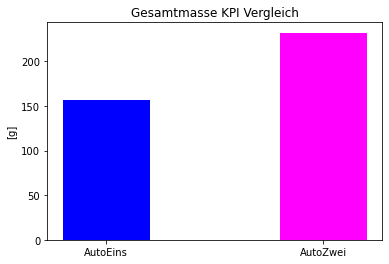

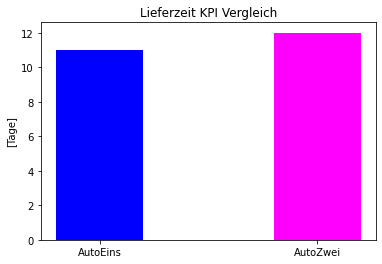

<Figure size 432x288 with 0 Axes>

In [16]:
#Plot Datei importieren
import matplotlib.pyplot as plt 

#Erstes Diagramm: Gesamtpreis
# Anzahl an Säulen
right = [1, 2]
  
# Säulenwerte 
height = [total_price1, total_price2] 

# Säulennamen
tick_label = ["AutoEins", "AutoZwei"] 
 
# Säulendiagramm plotten
plt.bar(right, height, tick_label = tick_label, width = 0.4, color = ["blue", "magenta"]) 
 
# Y-Achse  
plt.ylabel("[Euro]") 
# Diagrammname
plt.title("Gesamtpreis KPI Vergleich") 
  
# Diagramm plotten
plt.show() 

plt.savefig("Gesamtpreis KPI Vergleich.svg")


#Zweites Diagramm: Gesamtmasse
# Anzahl an Säulen
right = [1, 2]
  
# Säulenwerte 
height = [total_mass1, total_mass2] 

# Säulennamen
tick_label = ["AutoEins", "AutoZwei"] 
 
# Säulendiagramm plotten
plt.bar(right, height, tick_label = tick_label, width = 0.4, color = ["blue", "magenta"]) 

# Y-Achse  
plt.ylabel("[g]") 
# Diagrammname
plt.title("Gesamtmasse KPI Vergleich") 

# Diagramm plotten
plt.show() 

plt.savefig("Gesamtmasse KPI Vergleich.svg")


#Drittes Diagramm: Lieferzeit
# Anzahl an Säulen
right = [1, 2]
  
# Säulenwerte 
height = [delivery_time1, delivery_time2] 

# Säulennamen
tick_label = ["AutoEins", "AutoZwei"] 
 
# Säulendiagramm plotten
plt.bar(right, height, tick_label = tick_label, width = 0.4, color = ["blue", "magenta"]) 

# Y-Achse  
plt.ylabel("[Tage]") 
# Diagrammname
plt.title("Lieferzeit KPI Vergleich") 
  
# Diagramm plotten
plt.show() 

plt.savefig("Lieferzeit KPI Vergleich.svg")


Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Die Autos kosten beide gleich. Keine Veränderung bzgl. des Preises.
Die Masse des ersten Autos ist kleiner als die des zweiten Autos. Somit ist das zweite Auto schwerer. Ob das besser oder schlechter ist, ist schwer zu beurteilen.
Die Lieferzeit der beiden Autos unterscheiden sich um 1 Tag. Die Teile des ersten Autos sind nach 11 Tagen vorhanden und die Teile des zweiten Autos nach 12 Tagen.
Somit hat sich die Lieferzeit nicht verbessert und dementsprechend auch nicht die Qualität bzgl. der Lieferzeit.
Die Gesamtqualität wurde nicht wirklich beim zweiten Auto verbessert.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Die berechneten KPIs erfüllen die FAIR-Prinzipien. Die Daten können lange genutzt und wiederverwendet werden, wenn gewährleistet werden kann, dass die Daten regelmäßig öffentlich verfügbar sind. Damit wäre auch die Zugänglichkeit erfüllt. 

## Fazit

Zum ersten Mal hab ich mit LeoCad gearbeitet. Ich hab neues über KPIs und FAIR-Prinzpien gerlernt. Die Aufgabenstellung war amn manchen Stellen unklar, so das es manchmal länger gebraucht hat, um zu verstehen, was jetzt gemacht werden muss. Trotzdem hat das bauen des Lego Autos trotz beschränkter Bauteile sehr viel Spaß gemacht. Das Minimalbeispiel war eine große Hilfe und wenn man rausbekommen hat, wie man alles machen muss, war es auch einfach. Die zwei Wochen sind auch eine gute Bearbeitungszeit.